### **Course**: Machine Learning
**Teaching Staff**
 - Alípio Jorge
 - Inês Dutra

**Assignment nº 2**
- **Group B**:
 - Ana Raquel Maceiras (200604342) 
 - Hélder Vieira (up201503395)
 - Miguel Tavares (up200902937)
 - Rui Vieira (201403035) 

**Objective:**
- The challenge of this assignment is the following. Given a method A from a pool of methods L find a dataset D for which A is the best. A only has to be better than the other methods in L. Additionally, you are invited to explain why this happens.

In [196]:
import pandas as pd
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split,KFold, RepeatedKFold, cross_val_score

from sklearn.datasets import make_moons, make_circles, make_blobs, make_gaussian_quantiles, make_classification

In [106]:
def plot_classifier_boundary(model,X,h = .05):
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+0.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+0.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))

In [259]:
def decision_boundaries(X,y):
    # Models

    lor = logreg(class_weight='balanced',random_state=1, n_jobs=2).fit(X,y)
    lin  = lda().fit(X,y)
    #qua = qda().fit(X,y)
    tree = dtc(random_state=1).fit(X,y)
    forest = rfc(random_state=1).fit(X,y)
    svm_lin = SVC(kernel="linear", random_state=1, probability=True).fit(X,y)
    svm_rbf = SVC(kernel="rbf", random_state=1, probability=True).fit(X,y)
    svm_pol = SVC(kernel="poly", random_state=1, probability=True).fit(X,y)
    ann_relu = mlp(activation="relu",random_state=1).fit(X,y)
    ann_tanh = mlp(activation="tanh",random_state=1).fit(X,y)

    models=(lor,lin,qua,tree,forest,svm_lin,svm_rbf,svm_pol, ann_relu, ann_tanh)

    # Plotting

    fig = plt.figure(figsize = (18,30))

    cmp = colors.ListedColormap(["Blue", "Orange"])

    titles=("Logistic regression", "Linear Discriminant Analysis", 
            "Quadratic Discriminant Analysis", "Decision Tree",
           "Random Forest", "Support Vector Machines: linear kernel",
           "Support Vector Machines: radial kernel", "Support Vector Machines: polynomial kernel",
           "Multilayer Perceptron: Relu activation", "Multilayer Perceptron: Tangent activation")

    for i in range(len(models)):
        ax=fig.add_subplot(5,2,i+1)
        plot_classifier_boundary(models[i],X,h=0.15)
        ax.scatter(X[:,0], X[:,1], c= cmp(y))
        ax.set_title(titles[i])
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")
    plt.show()

#### 2D Balanced, Gaussian Quantiles: Clean

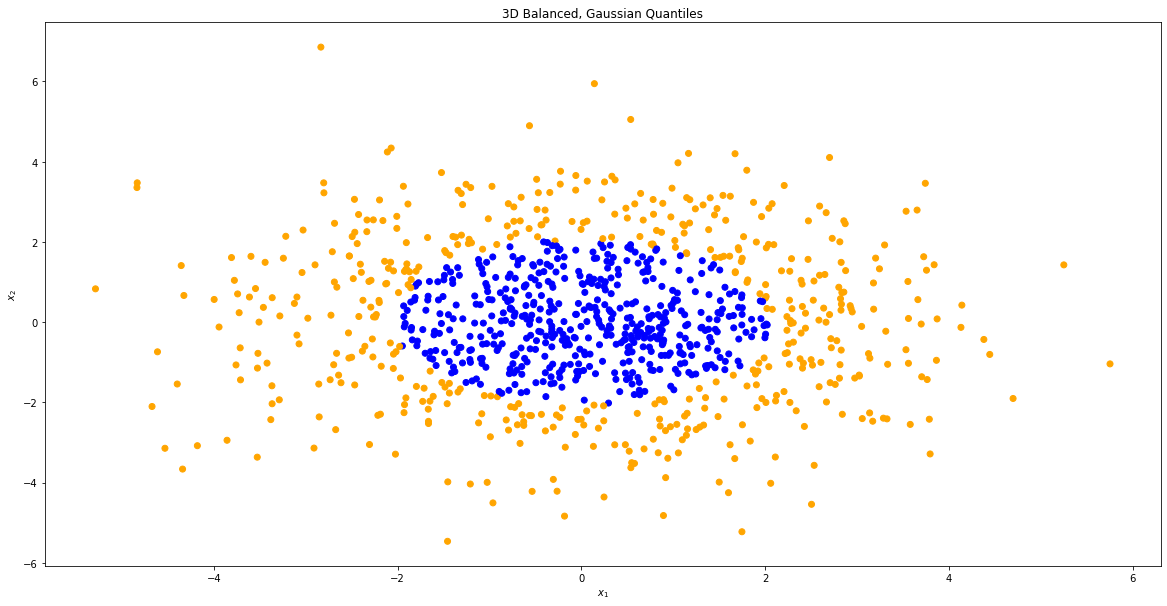

In [239]:
X, y = make_gaussian_quantiles(cov=3.0,
                               n_samples=1000, n_features=2,
                               n_classes=2, random_state=1)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot()

cmp = colors.ListedColormap(["Blue", "Orange"])

ax1.scatter(X[:,0], X[:,1], c= cmp(y))
ax1.set_title("3D Balanced, Gaussian Quantiles")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")

plt.show()

C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


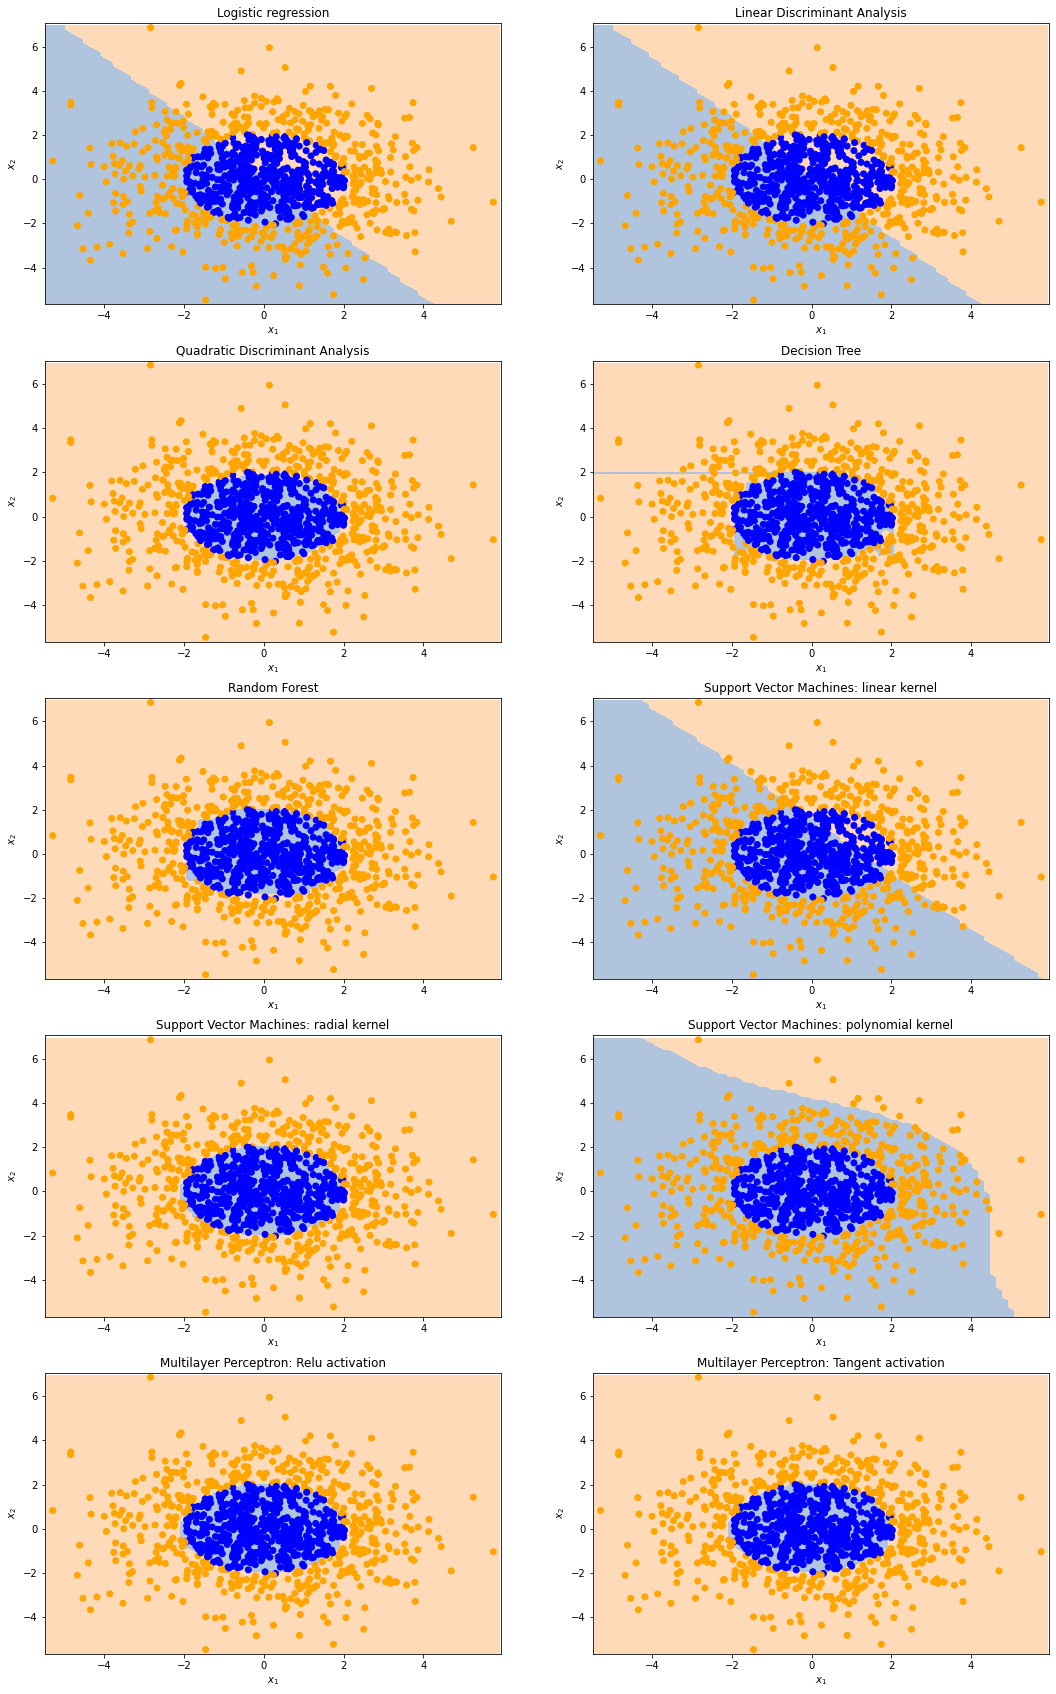

In [243]:
decision_boundaries(X,y)

**Comentário**
- Logistic Regression and Linear Discriminant Analysis can't properly separate the classes
- Quadratic Discriminant Analysis, however, seems to have separated them exactly.
- The default Decision Tree Classifier seems to have correctly predicted all the datapoints, however there's a slight incongruence protruding out from blue class, which should decrease the performance metrics.
- The default Random forest classifier purports to have classified all datapoints correctly, with a few exceptions. The same could be said about the SVC with radial kernel, MLP with ReLu and Tangent activations.
- The SVC with polynimial and linear kernels are presenting a poor performance based on decision boundary-classification.

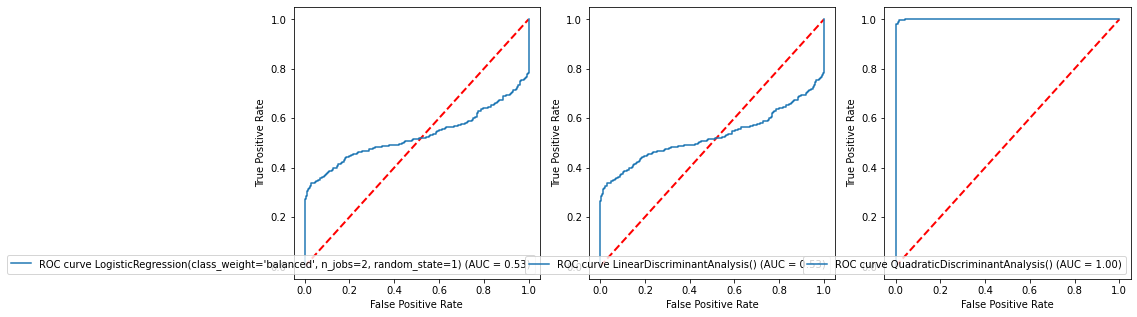

In [135]:
# Analysis

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle=True, random_state=1)

fig = plt.figure(figsize = (15,5))

for i in range(len(models)):
    ax=fig.add_subplot(1,3,i+1)
    plt.plot([0,1],[0,1], ls ="--", lw=2, c="r")
    plot_roc_curve(models[i],X,y, name=f"ROC curve {models[i]}", ax=ax)
plt.show()

C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multi

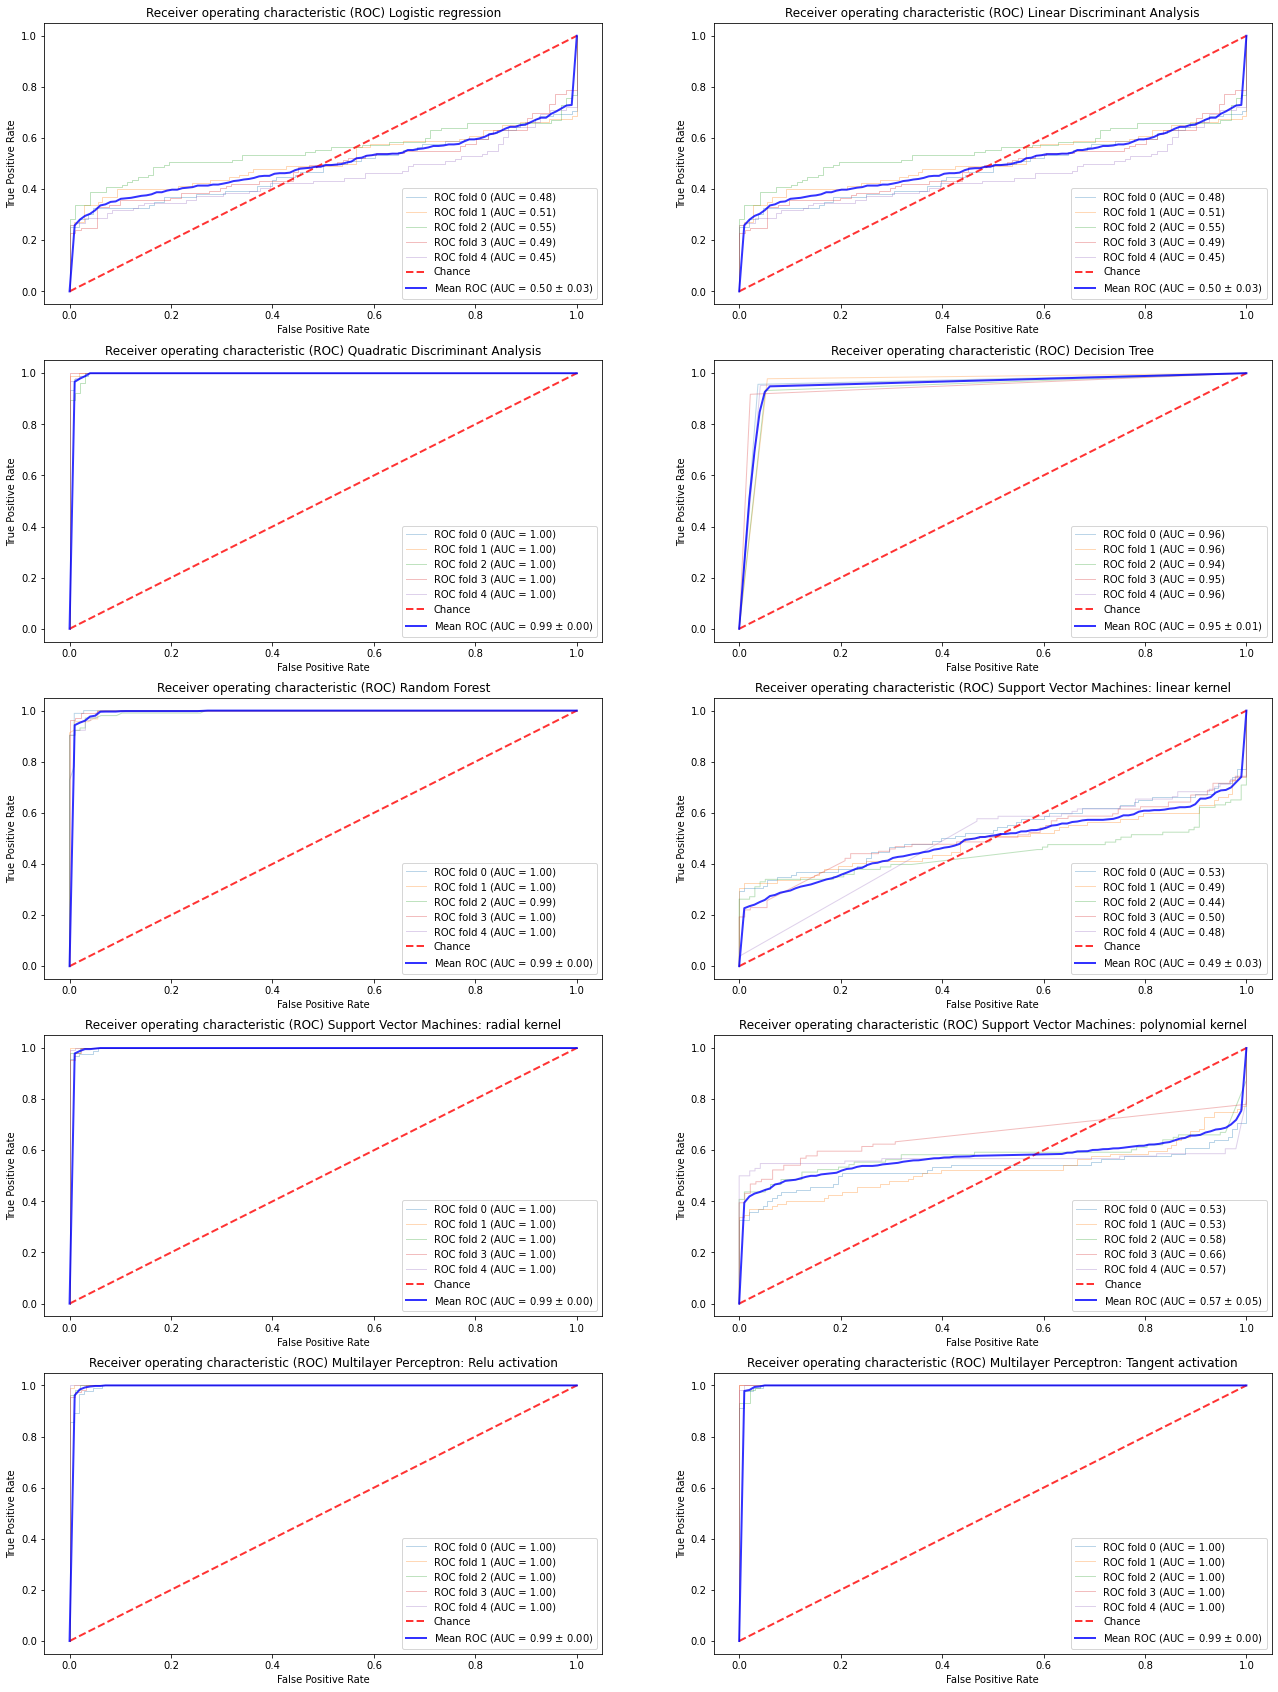

In [209]:
# Sklearn adapted
# Source https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

def roc_curves(models,X,y):
    
    cv = KFold(n_splits=5, shuffle=True, random_state=1)

    mean_fpr = np.linspace(0, 1, 100)

    fig, axs = plt.subplots(nrows=5, ncols=2, figsize = (22,30))

    ax = axs.ravel()

    for i in range(len(models)):
        tprs = []
        aucs = []
        for j, (train, test) in enumerate(cv.split(X)):
            models[i].fit(X[train], y[train])
            viz = plot_roc_curve(models[i], X[test], y[test],
                                 name='ROC fold {}'.format(j),
                                 alpha=0.3, lw=1, ax=ax[i])
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)

        ax[i].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                label='Chance', alpha=.8)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax[i].plot(mean_fpr, mean_tpr, color='b',
                label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                lw=2, alpha=.8)

    # std_tpr = np.std(tprs, axis=0)
    # tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    # tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    # ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
    #                 label=r'$\pm$ 1 std. dev.')

        ax[i].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
               title="Receiver operating characteristic (ROC) %s" %  (titles[i]))
        ax[i].legend(loc="lower right")
    plt.show()
    
roc_curves(models,X,y)

In [210]:
def scoring(models, X, y):
    data = []
    for model in models:
        accuracy = np.mean(cross_val_score(model, X, y, scoring="accuracy", cv = kf, n_jobs=2))
        f1scores = np.mean(cross_val_score(model, X, y, scoring="f1", cv = kf, n_jobs=2))
        auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        data += [[accuracy, f1scores, auc_score]]
    return pd.DataFrame(data, columns=["Accuracy", "F1scores", "Auc_score"], index = [title for title in titles] )

scoring(models, X,y)

Accuracy  F1scores  Auc_score
Logistic regression                            0.506  0.508934   0.528576
Linear Discriminant Analysis                   0.498  0.512170   0.528576
Quadratic Discriminant Analysis                0.970  0.970522   0.998999
Decision Tree                                  0.968  0.967366   0.994845
Random Forest                                  0.971  0.971052   0.999900
Support Vector Machines: linear kernel         0.590  0.536929   0.397157
Support Vector Machines: radial kernel         0.986  0.985718   0.998899
Support Vector Machines: polynomial kernel     0.475  0.410242   0.465369
Multilayer Perceptron: Relu activation         0.980  0.979325   0.999800
Multilayer Perceptron: Tangent activation      0.985  0.985236   0.999299

#### 3D Balanced, Gaussian Quantiles

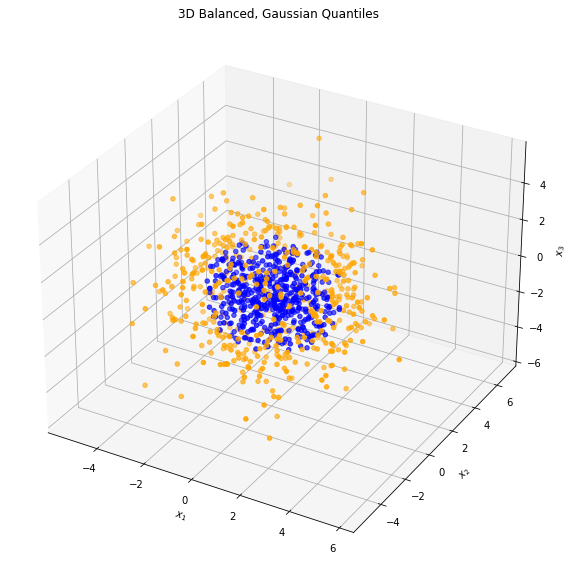

In [54]:
X, y = make_gaussian_quantiles(cov=3.0,
                               n_samples=1000, n_features=3,
                               n_classes=2, random_state=1)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(projection='3d')

cmp = colors.ListedColormap(["Blue", "Orange"])

ax1.scatter(X[:,0], X[:,1],X[:,2], c= cmp(y))
ax1.set_title("3D Balanced, Gaussian Quantiles")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_zlabel("$x_3$")

plt.show()

#### 2D Balanced Gaussian Quantiles: hard + enclave

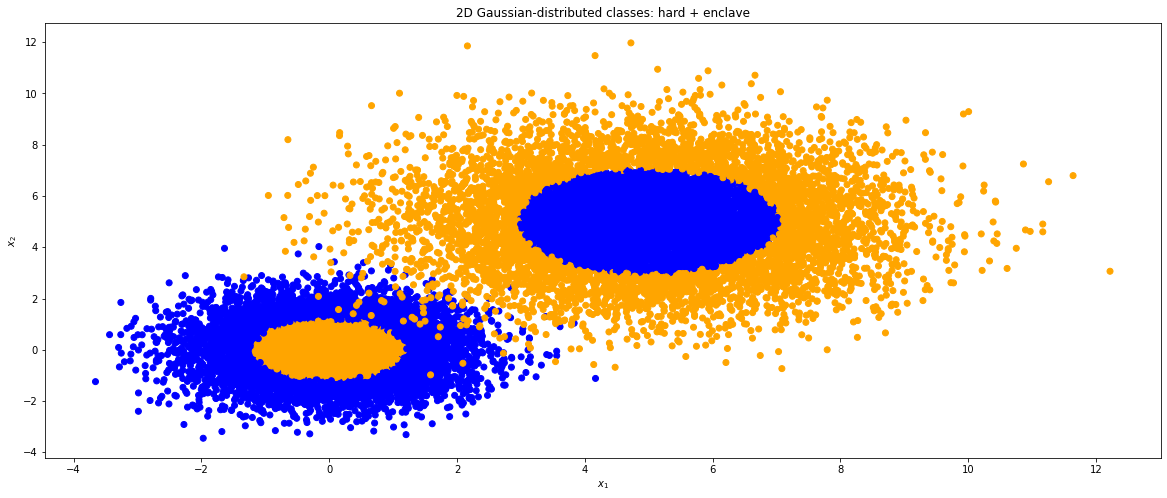

In [55]:
# Cluster 1
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=10000, n_features=2,
                                 n_classes=2, random_state=1)

# Cluster 2

X2, y2 = make_gaussian_quantiles(mean=(5,5), cov=3.,
                                 n_samples=10000, n_features=2,
                                 n_classes=2, random_state=1)


X=np.concatenate((X1,X2), axis=0)
y=np.concatenate((-y1+1,y2),axis=0)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot()

cmp = colors.ListedColormap(["Blue", "Orange"])

ax1.scatter(X[:,0], X[:,1], c= cmp(y))
ax1.set_title("2D Gaussian-distributed classes: hard + enclave")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")

plt.show()

####  2D Balanced Gaussian Blobs

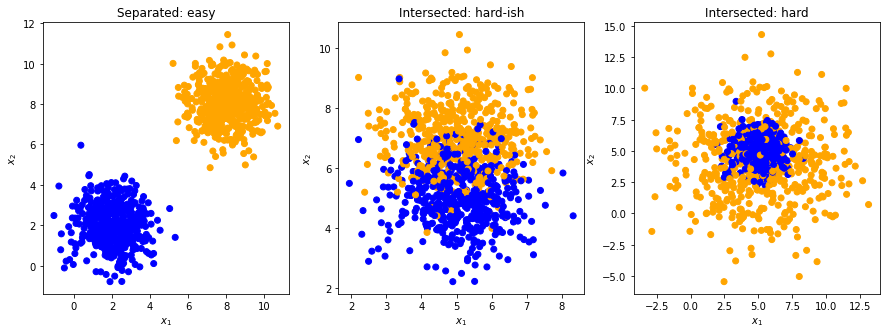

In [244]:
# Separated: Clean

X1,y1 = make_blobs(n_samples=1000, n_features=2,
                centers=[(2,2), (8,8)], cluster_std=[1,1],
                random_state=1)

# Intersected: hard-ish

X2,y2 = make_blobs(n_samples=1000, n_features=2,
                centers=[(5,5), (5,7)], cluster_std=[1,1],
                random_state=1)

# Intersected: hard

X3,y3 = make_blobs(n_samples=1000, n_features=2,
                centers=[(5,5), (5,4)], cluster_std=[1,3],
                random_state=1)


titles = ("Separated: easy",
         "Intersected: hard-ish",
         "Intersected: hard")

X,y = (X1,X2,X3), (y1,y2,y3)

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

cmp = colors.ListedColormap(["Blue", "Orange"])

ax = axs.ravel()
for i in range(len(X)):
    ax[i].scatter(X[i][:,0], X[i][:,1], c= cmp(y[i]))
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")

plt.show()

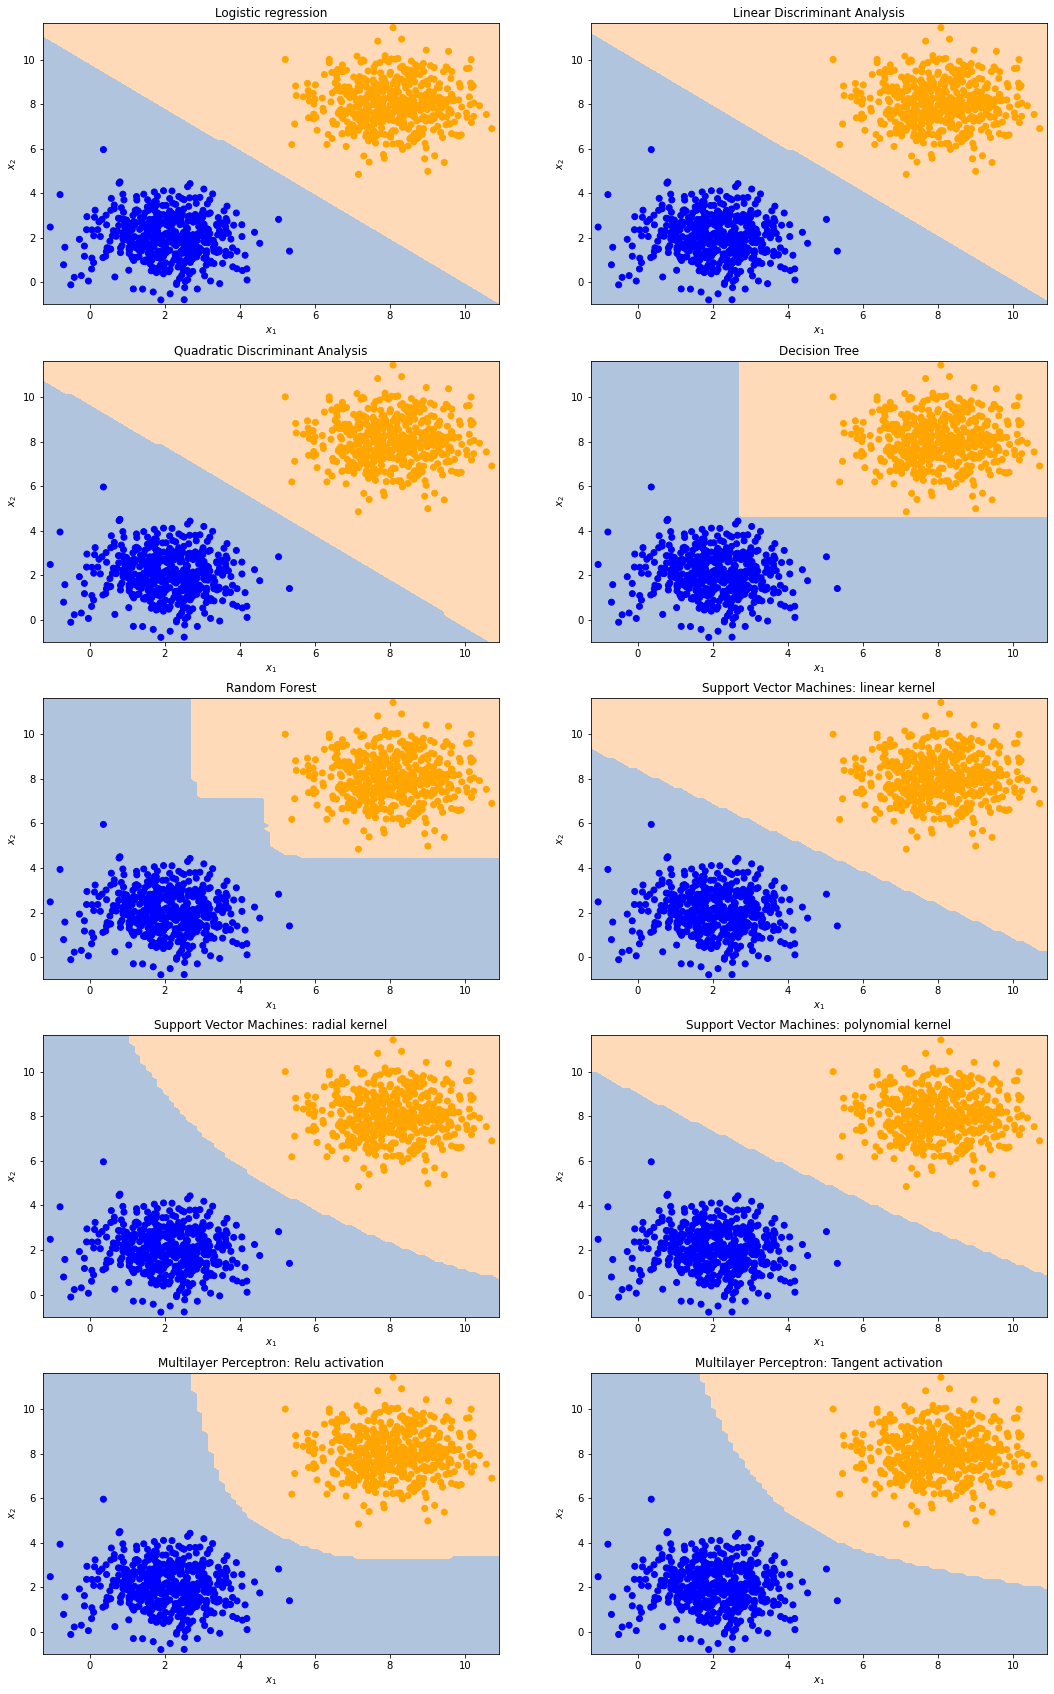

In [248]:
decision_boundaries(X1,y1)

#### 2D Unbalanced Gaussian Blobs: Separated & Intersected

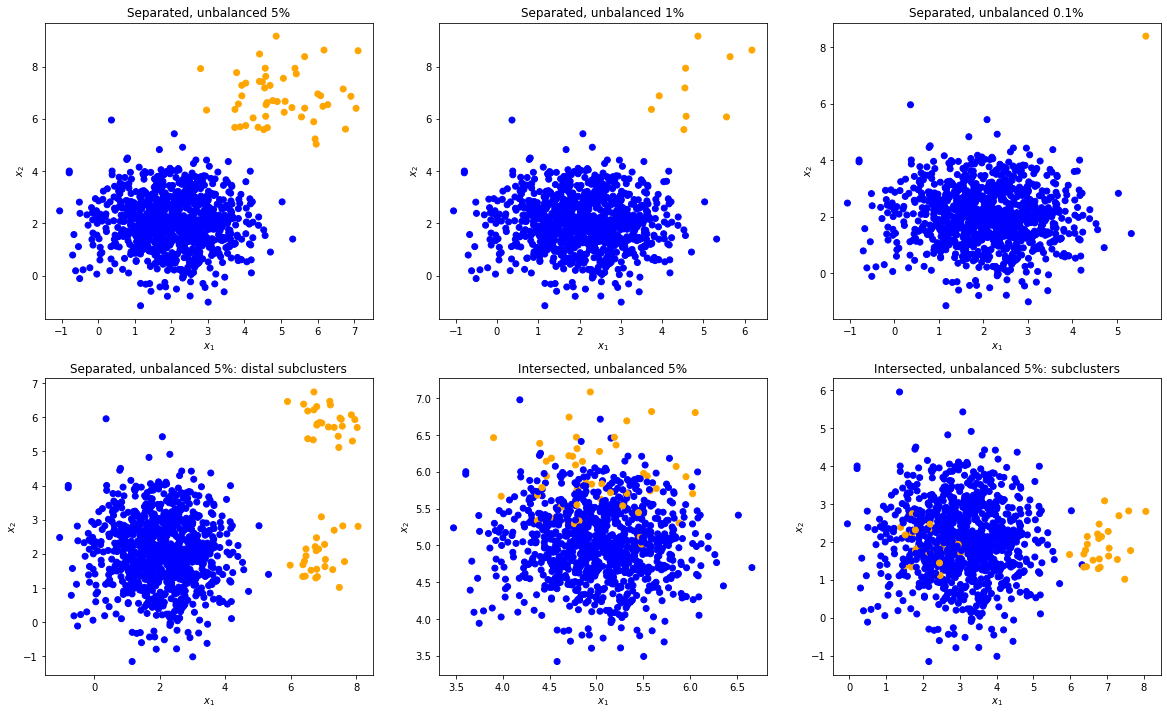

In [249]:
# Separated, unbalanced 5%

X1,y1 = make_blobs(n_samples=[950,50], n_features=2,
                centers=[(2,2), (5,7)], cluster_std=[1,1],
                random_state=1)

# Separated, unbalanced 1%

X2,y2 = make_blobs(n_samples=[990,10], n_features=2,
                centers=[(2,2), (5,7)], cluster_std=[1,1],
                random_state=1)

# Separated, unbalanced 0.1% 

X3,y3 = make_blobs(n_samples=[999,1], n_features=2,
                centers=[(2,2), (5,7)], cluster_std=[1,1],
                random_state=1)

# Separated, unbalanced 5%: distal subclusters

X4,y4 = make_blobs(n_samples=[950,25,25], n_features=2,
                centers=[(2,2), (7,6), (7,2)], cluster_std=[1,0.5,0.5],
                random_state=1)

# Intersected, unbalanced 5%

X5,y5 = make_blobs(n_samples=[950,50], n_features=2,
                centers=[(5,5), (5,6)], cluster_std=[0.5,0.5],
                random_state=1)

# Intersected, unbalanced 5%: subclusters

X6,y6 = make_blobs(n_samples=[950,25,25], n_features=2,
                centers=[(3,2), (2,2), (7,2)], cluster_std=[1,0.5,0.5],
                random_state=1)

titles = ("Separated, unbalanced 5%",
         "Separated, unbalanced 1%",
         "Separated, unbalanced 0.1%",
         "Separated, unbalanced 5%: distal subclusters",
         "Intersected, unbalanced 5%",
         "Intersected, unbalanced 5%: subclusters")

X,y = (X1,X2,X3,X4,X5,X6), (y1,y2,y3,y4,y5,y6)

f, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

cmp = colors.ListedColormap(["Blue", "Orange"])

ax = axs.ravel()
for i in range(len(X)):
    ax[i].scatter(X[i][:,0], X[i][:,1], c= cmp(y[i]))
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")

plt.show()

C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


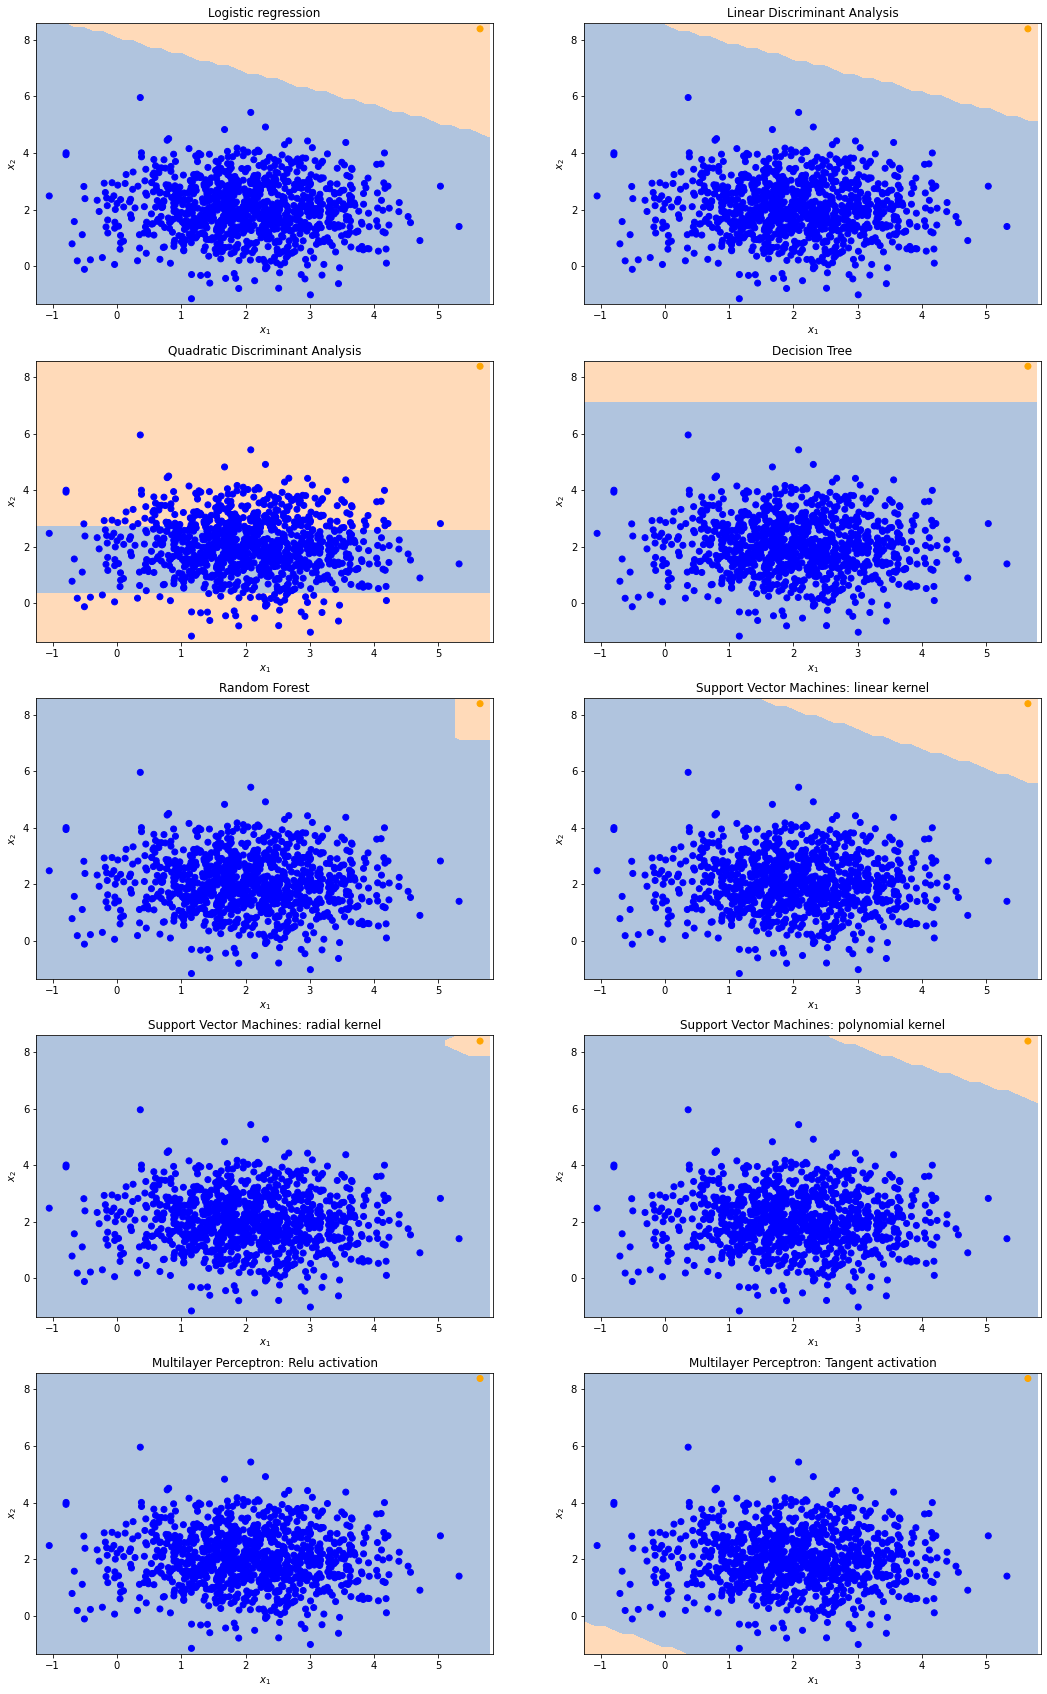

In [260]:
decision_boundaries(X3,y3)

#### 2D Gaussian samples: make_classification

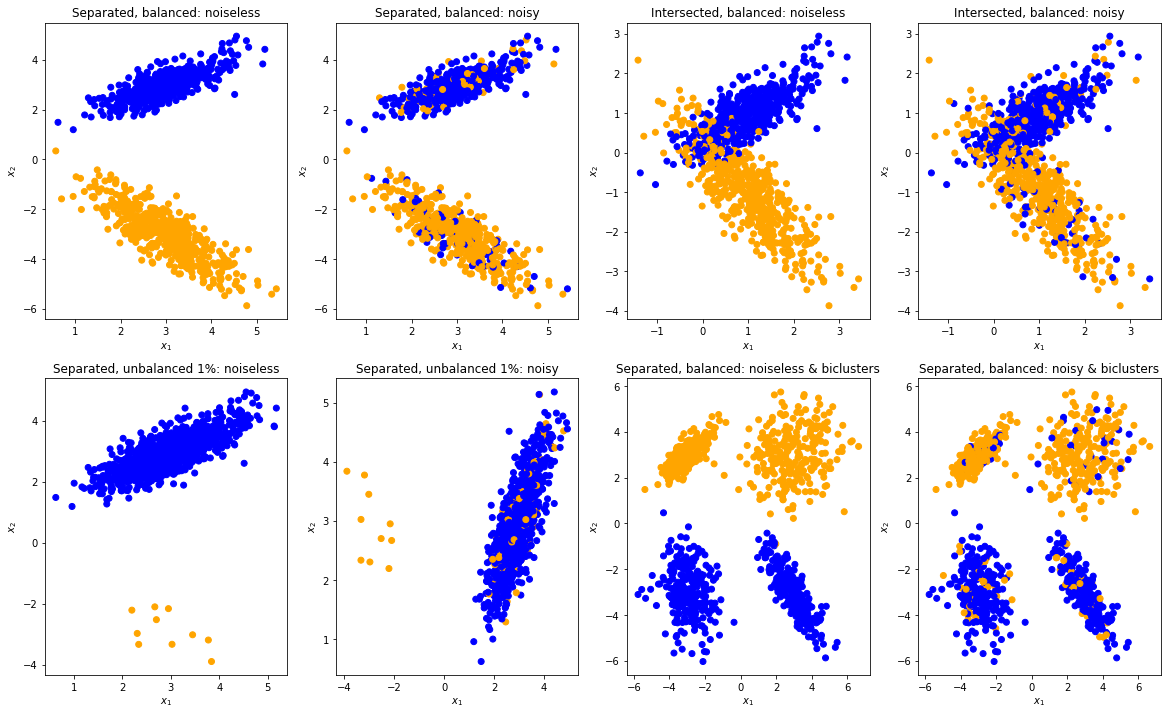

In [261]:
# Separated, balanced: noiseless

X1,y1 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=0,weights=[0.5,0.5],
                          random_state=1)

# Separated, balanced: noisy

X2,y2 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=.25,weights=[0.5,0.5],
                          random_state=1)

# Intersected, balanced: noiseless

X3,y3 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=1,class_sep=1,
                          flip_y=0,weights=[0.5,0.5],
                          random_state=1)

# Intersected, balanced: noisy

X4,y4 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=1,class_sep=1,
                          flip_y=.25,weights=[0.5,0.5],
                          random_state=1)

# Separated, unbalanced 1%: noiseless

X5,y5 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=0,weights=[0.99,0.01],
                          random_state=1)

# Separated, unbalanced 1%: noisy

X6,y6 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=.2,weights=[0.99,0.01],
                          random_state=1)

# Separated, balanced: noiseless & biclusters 

X7,y7 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=2,class_sep=3,
                          flip_y=0,weights=[0.5,0.5],
                          random_state=1)

# Separated, balanced: noisy & biclusters 


X8,y8 = make_classification(n_samples=1000, n_classes=2,
                          n_features=2, n_informative=2,
                         n_redundant=0, n_repeated=0,
                         n_clusters_per_class=2,class_sep=3,
                          flip_y=.2,weights=[0.5,0.5],
                          random_state=1)

# Plotting 

titles = ("Separated, balanced: noiseless",
         "Separated, balanced: noisy",
         "Intersected, balanced: noiseless",
         "Intersected, balanced: noisy",
         "Separated, unbalanced 1%: noiseless",
         "Separated, unbalanced 1%: noisy",
         "Separated, balanced: noiseless & biclusters",
         "Separated, balanced: noisy & biclusters")

X,y = (X1,X2,X3,X4,X5,X6,X7,X8), (y1,y2,y3,y4,y5,y6,y7,y8)

f, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,12))

cmp = colors.ListedColormap(["Blue", "Orange"])

ax = axs.ravel()
for i in range(len(X)):
    ax[i].scatter(X[i][:,0], X[i][:,1], c= cmp(y[i]))
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")

plt.show()

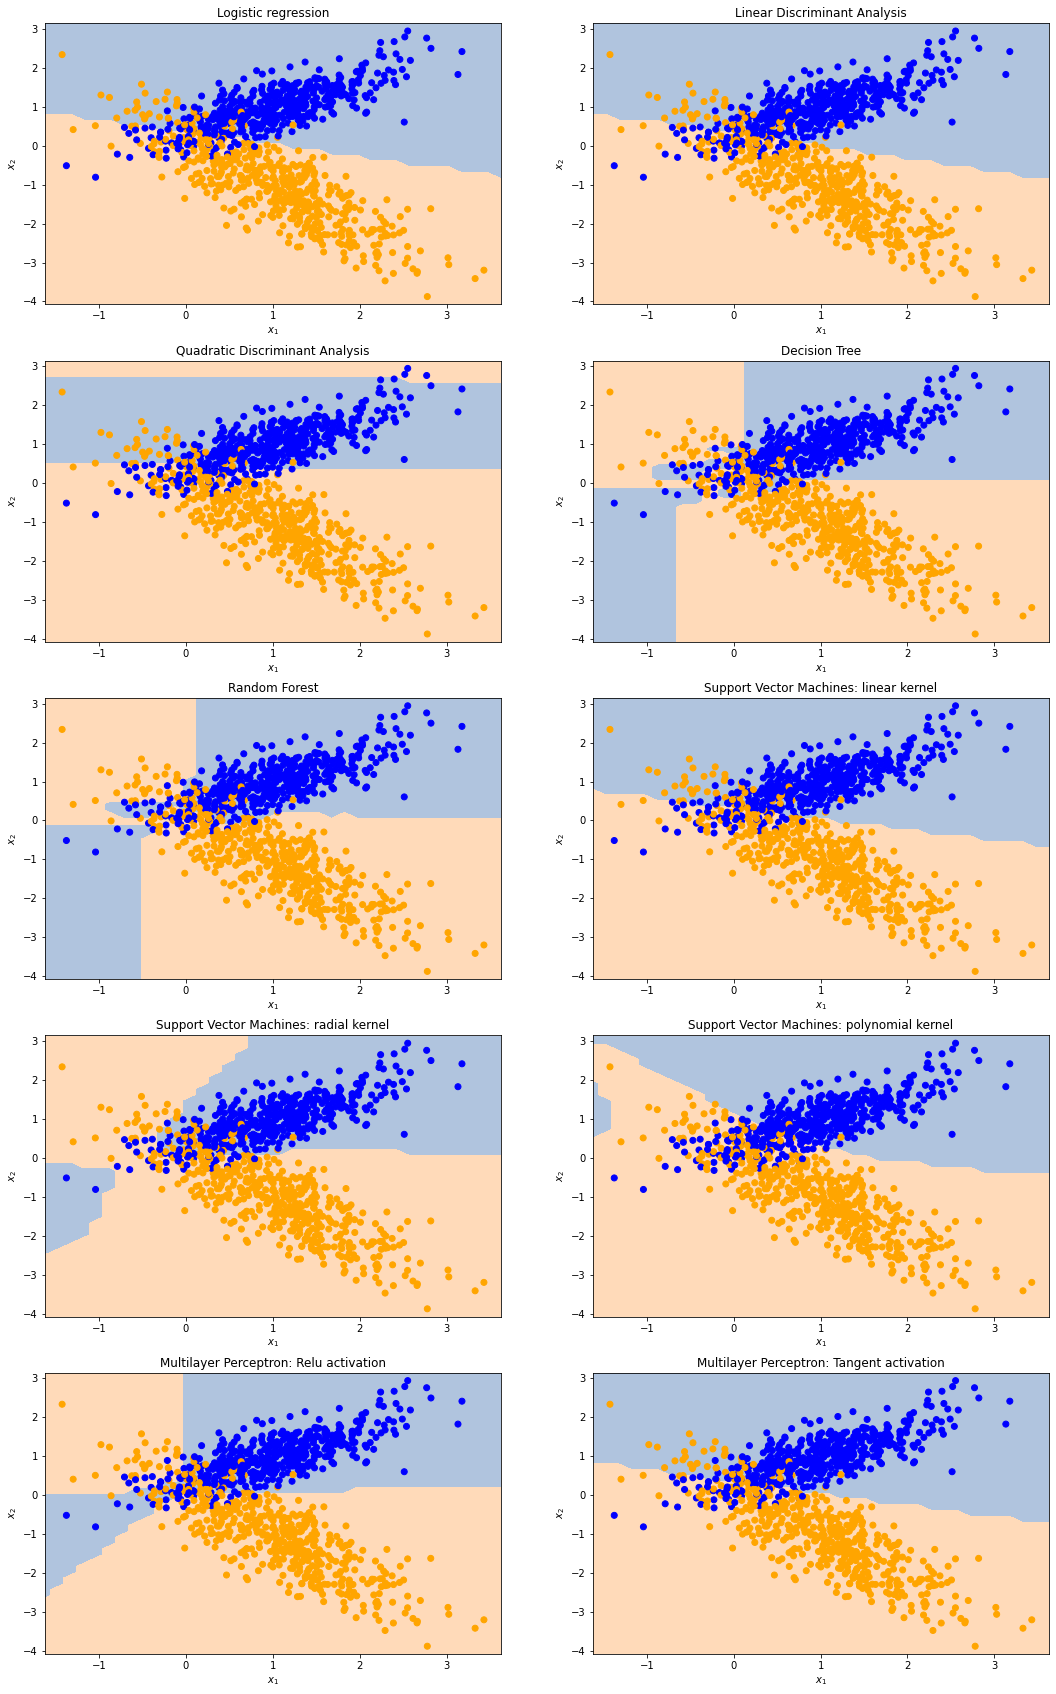

In [265]:
decision_boundaries(X3,y3)

#### 2D Gaussian samples: make_classification: +1 redundant feature

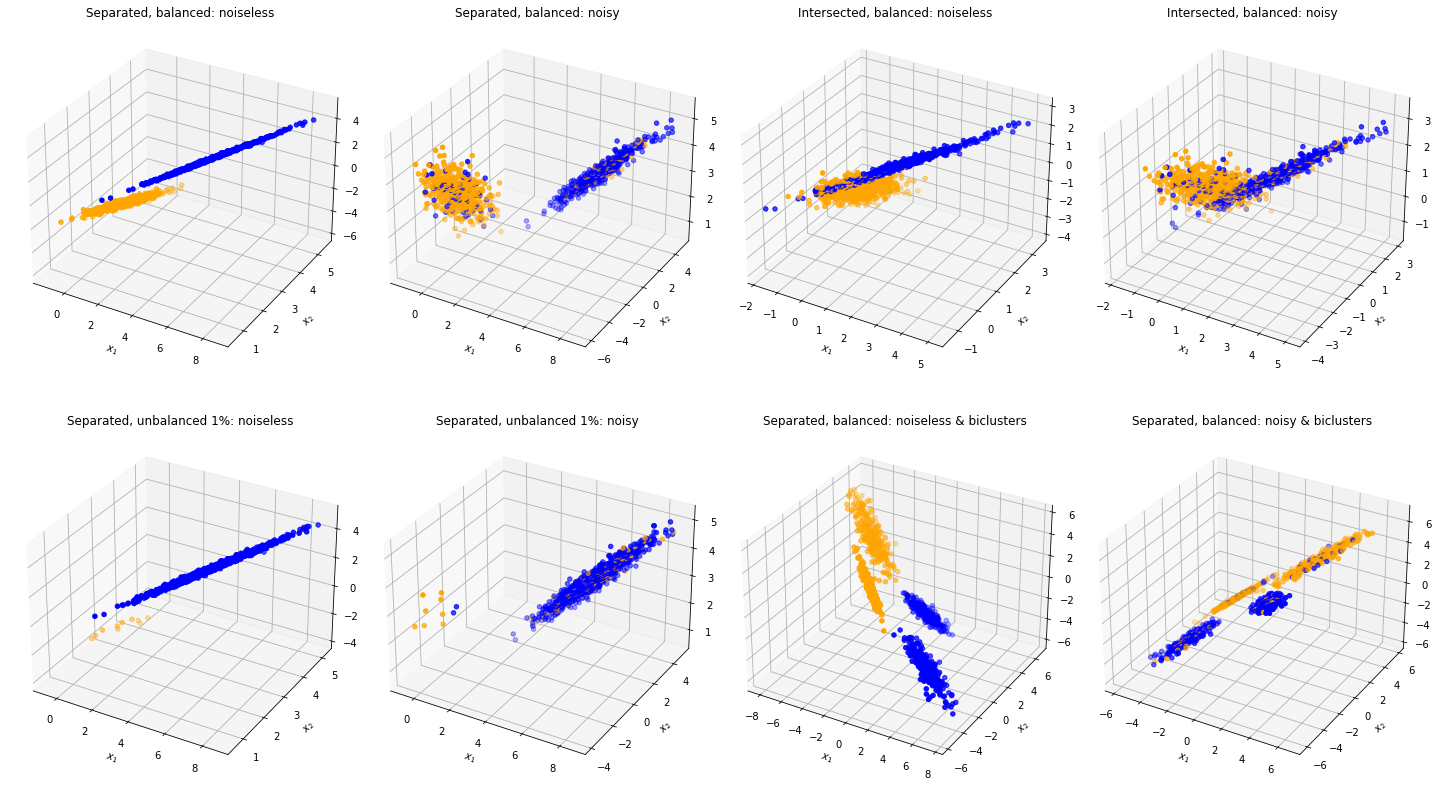

In [134]:
# Separated, balanced: noiseless +1 redundant feature

X1,y1 = make_classification(n_samples=1000, n_classes=2,
                          n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=0,weights=[0.5,0.5],
                          random_state=1)

# Separated, balanced: noisy +1 redundant feature

X2,y2 = make_classification(n_samples=1000, n_classes=2,
                          n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=.25,weights=[0.5,0.5],
                          random_state=1)

# Intersected, balanced: noiseless +1 redundant feature

X3,y3 = make_classification(n_samples=1000, n_classes=2,
                          n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=1,class_sep=1,
                          flip_y=0,weights=[0.5,0.5],
                          random_state=1)

# Intersected, balanced: noisy +1 redundant feature

X4,y4 = make_classification(n_samples=1000, n_classes=2,
                          n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=1,class_sep=1,
                          flip_y=.25,weights=[0.5,0.5],
                          random_state=1)

# Separated, unbalanced 1%: noiseless +1 redundant feature
 
X5,y5 = make_classification(n_samples=1000, n_classes=2,
                         n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=0,weights=[0.99,0.01],
                          random_state=1)

# Separated, unbalanced 1%: noisy +1 redundant feature

X6,y6 = make_classification(n_samples=1000, n_classes=2,
                          n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=1,class_sep=3,
                          flip_y=.2,weights=[0.99,0.01],
                          random_state=1)

# Separated, balanced: noiseless & biclusters 

X7,y7 = make_classification(n_samples=1000, n_classes=2,
                         n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=2,class_sep=3,
                          flip_y=0,weights=[0.5,0.5],
                          random_state=1)

# Separated, balanced: noisy & biclusters 


X8,y8 = make_classification(n_samples=1000, n_classes=2,
                          n_features=3, n_informative=2,
                         n_redundant=1, n_repeated=0,
                         n_clusters_per_class=2,class_sep=3,
                          flip_y=.2,weights=[0.5,0.5],
                          random_state=1)

# Plotting 

titles = ("Separated, balanced: noiseless",
         "Separated, balanced: noisy",
         "Intersected, balanced: noiseless",
         "Intersected, balanced: noisy",
         "Separated, unbalanced 1%: noiseless",
         "Separated, unbalanced 1%: noisy",
         "Separated, balanced: noiseless & biclusters",
         "Separated, balanced: noisy & biclusters")

X,y = (X1,X2,X3,X4,X5,X6, X7,X8), (y1,y2,y3,y4,y5,y6,y7,y8)

fig = plt.figure(figsize=(20,12))
cmp = colors.ListedColormap(["Blue", "Orange"])

for i in range(len(X)):
    ax = fig.add_subplot(2,4, i+1, projection='3d')
    ax.scatter(X[i][:,0], X[i][:,1], X[i][:,2], c= cmp(y[i]))
    ax.set_title(titles[i])
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

plt.tight_layout()
plt.show()

### make_circles

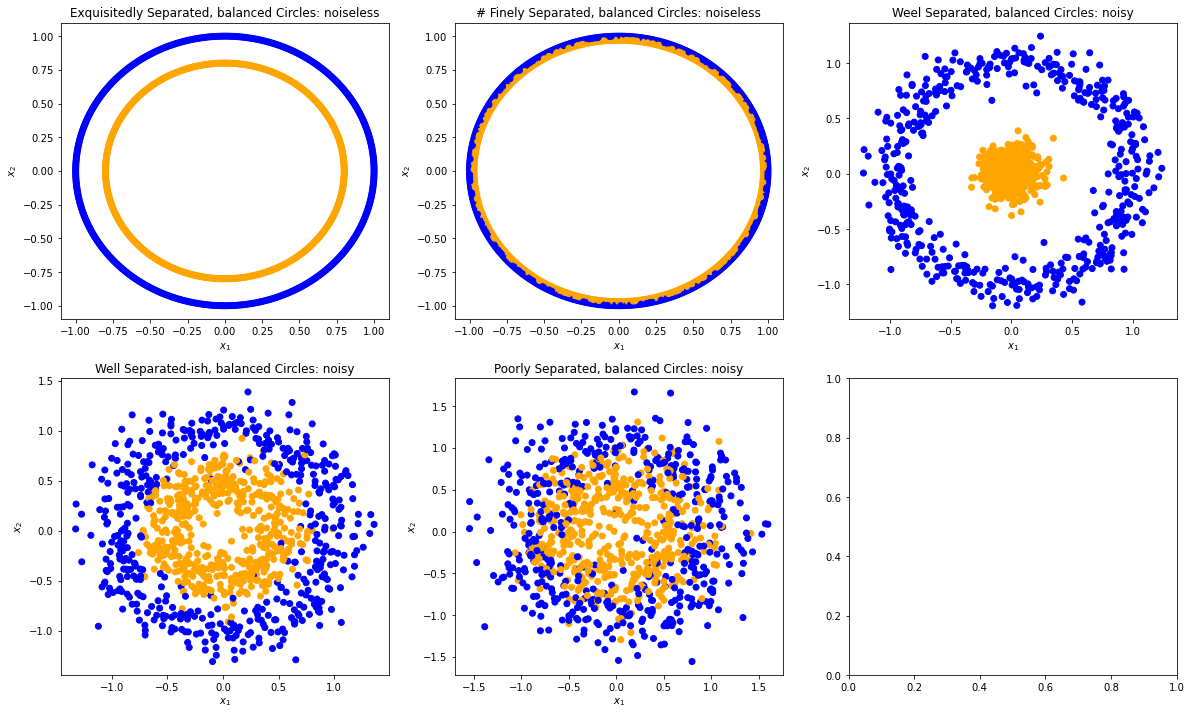

In [164]:
# Well Separated, balanced Circles: noiseless

X1,y1 = make_circles(n_samples=1000, noise=None,
                     factor=0.8, random_state=1)

# Finely Separated, balanced Circles: noiseless

X5,y5 = make_circles(n_samples=1000, noise=None,
                     factor=0.97, random_state=1)


# Well Separated, balanced Circles: noisy

X2,y2 = make_circles(n_samples=1000, noise=0.1,
                     factor=0.1, random_state=1)

# Well Separated-ish, balanced Circles: noisy

X3,y3 = make_circles(n_samples=1000, noise=0.15,
                     factor=0.5, random_state=1)

# Poorly Separated, balanced Circles: noisy

X4,y4 = make_circles(n_samples=1000, noise=0.25,
                     factor=0.6, random_state=1)


# Plotting 

titles = ("Exquisitedly Separated, balanced Circles: noiseless",
          "# Finely Separated, balanced Circles: noiseless",
         "Weel Separated, balanced Circles: noisy",
         "Well Separated-ish, balanced Circles: noisy",
          "Poorly Separated, balanced Circles: noisy")

X,y = (X1,X5,X2,X3,X4), (y1,y5,y2,y3,y4) #,X6,X7,X8,y6,y7,y8

f, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

cmp = colors.ListedColormap(["Blue", "Orange"])

ax = axs.ravel()
for i in range(len(X)):
    ax[i].scatter(X[i][:,0], X[i][:,1], c= cmp(y[i]))
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")

plt.show()

### make_moons

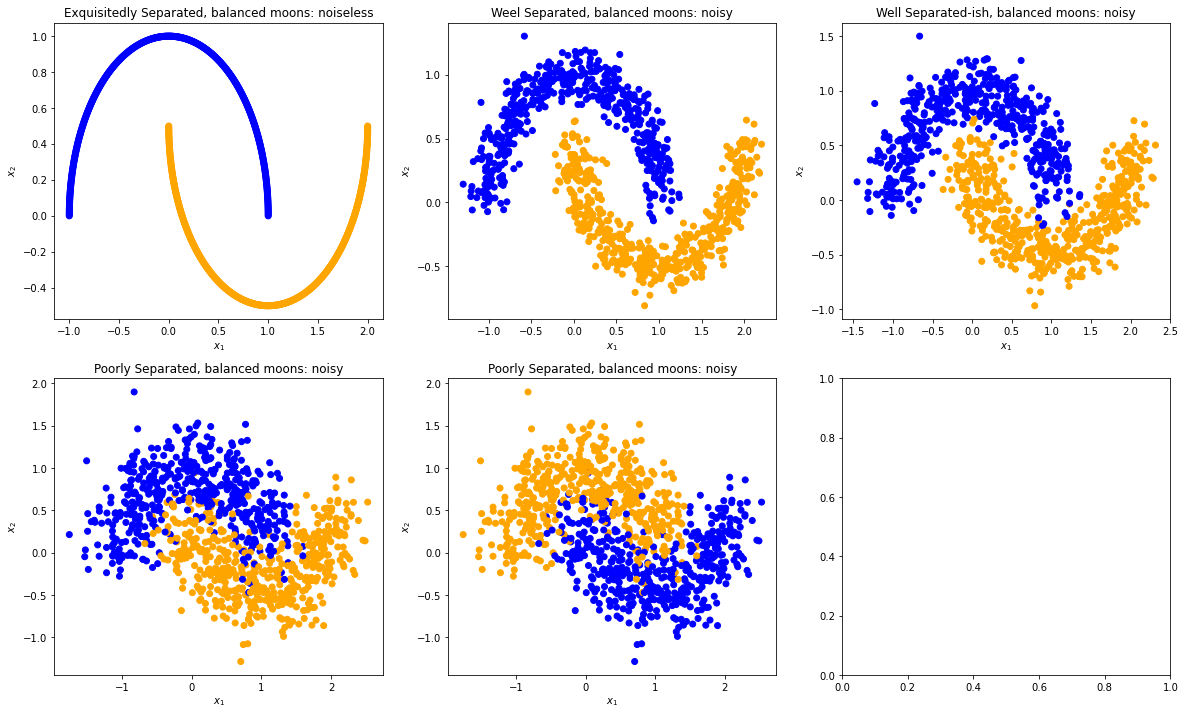

In [266]:
# Well Separated, balanced moons: noiseless

X1,y1 = make_moons(n_samples=1000, noise=None, random_state=1)

# Well Separated, balanced moons: noisy

X2,y2 = make_moons(n_samples=1000, noise=0.1,
                     random_state=1)

# Well Separated-ish, balanced moons: noisy

X3,y3 = make_moons(n_samples=1000, noise=0.15,
                     random_state=1)

# Poorly Separated, balanced moons: noisy

X4,y4 = make_moons(n_samples=1000, noise=0.25,
                    random_state=1)


# Poorly Separated, balanced moons: noisy

X5,y5 = make_moons(n_samples=1000, noise=0.25,
                    random_state=1)

y51= -y5+1

# Plotting 

titles = ("Exquisitedly Separated, balanced moons: noiseless",
         "Weel Separated, balanced moons: noisy",
         "Well Separated-ish, balanced moons: noisy",
          "Poorly Separated, balanced moons: noisy",
         "Poorly Separated, balanced moons: noisy")

X,y = (X1,X2,X3,X4,X5), (y1,y2,y3,y4,y51) #,X6,X7,X8,y6,y7,y8

f, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

cmp = colors.ListedColormap(["Blue", "Orange"])

ax = axs.ravel()
for i in range(len(X)):
    ax[i].scatter(X[i][:,0], X[i][:,1], c= cmp(y[i]))
    ax[i].set_title(titles[i])
    ax[i].set_xlabel("$x_1$")
    ax[i].set_ylabel("$x_2$")

plt.show()

C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


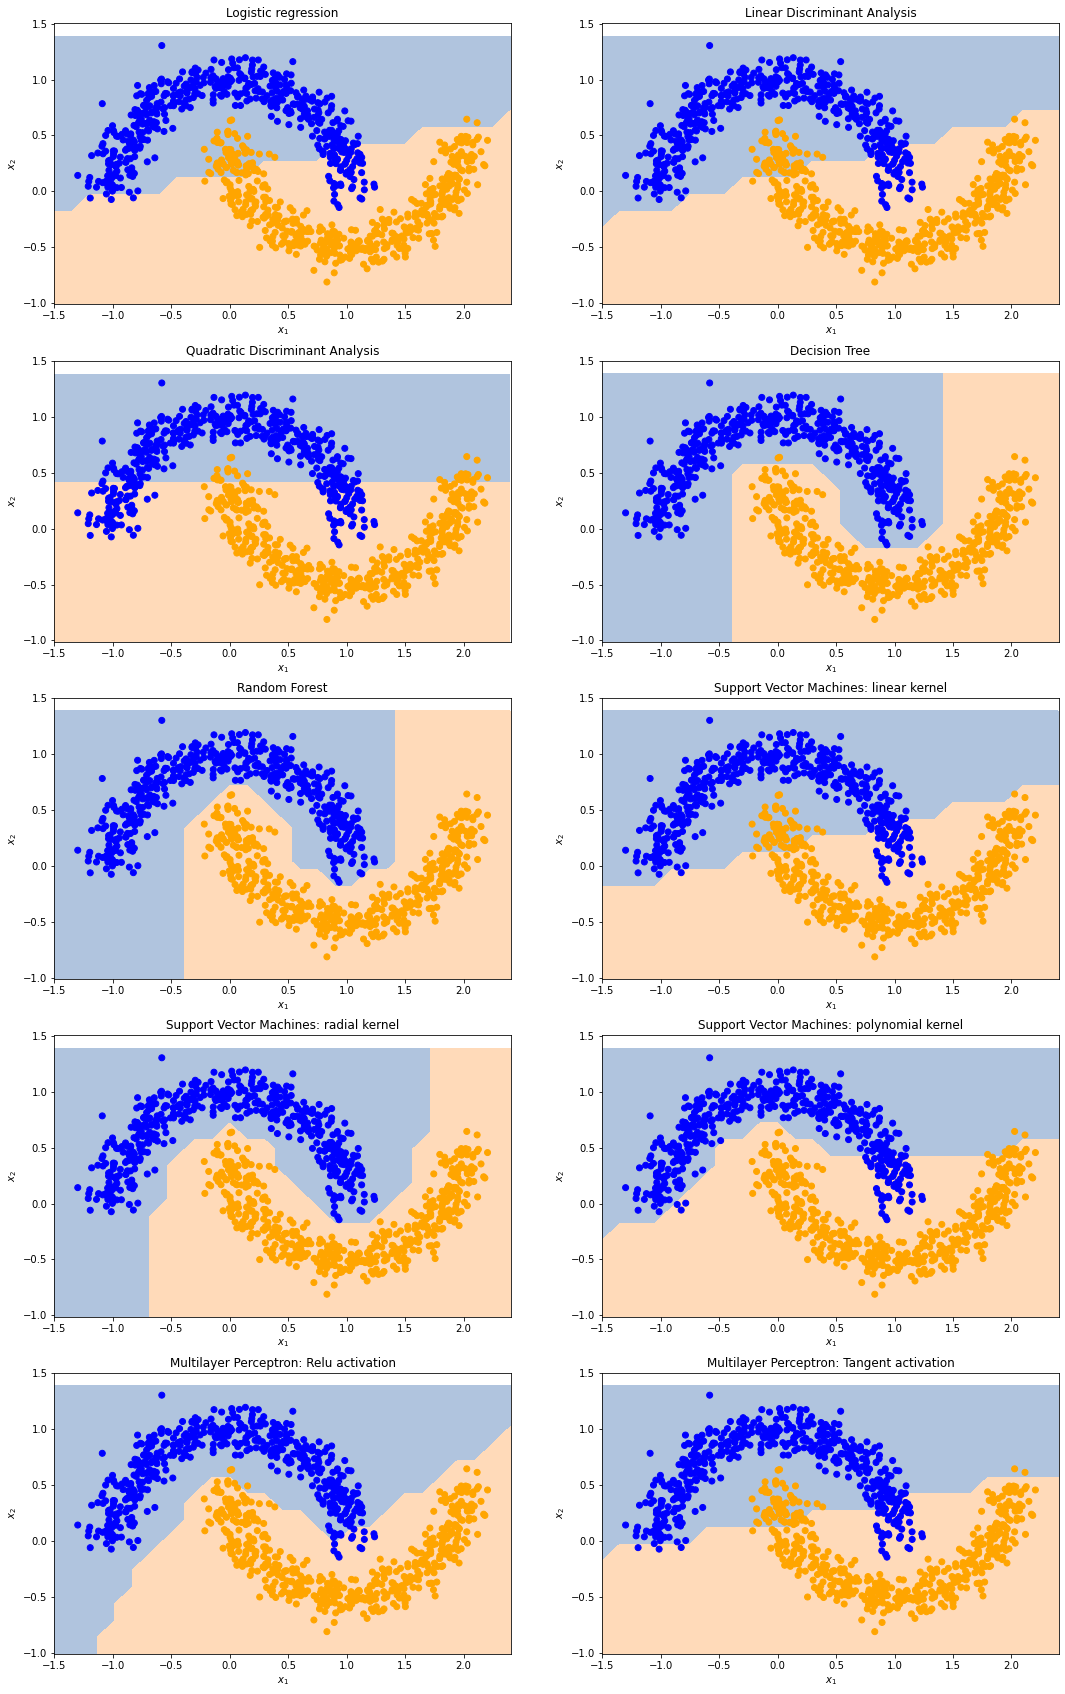

In [267]:
decision_boundaries(X2,y2)

### Circle vs spread 

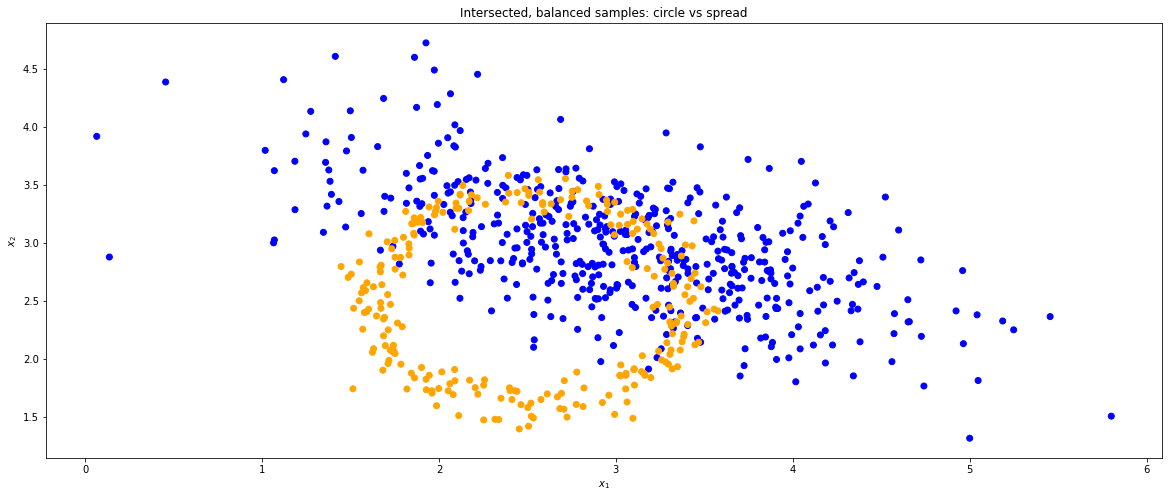

In [268]:
X1,y1 = make_classification(n_classes=1,n_samples=500, n_features=2, class_sep=3,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_clusters_per_class=1,
                          flip_y=0.1, weights=[1],random_state=1)

X2,y2 = make_circles(n_samples=500, factor=0.9,noise=0.1, random_state=1)

X2_0 = X2[np.where(y2==1)]+2.5
y2_0 = y2[np.where(y2==1)]

X = np.concatenate((X1,X2_0),axis=0)
y = np.concatenate((y1,y2_0),axis=0)

cmp = colors.ListedColormap(["Blue", "Orange"])

titles=("Intersected, balanced samples: circle vs spread")

fig=plt.figure(figsize=(20,8))

ax=fig.add_subplot()
ax.scatter(X[:,0], X[:,1], c = cmp(y))
ax.set_title(titles)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

plt.show()

C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


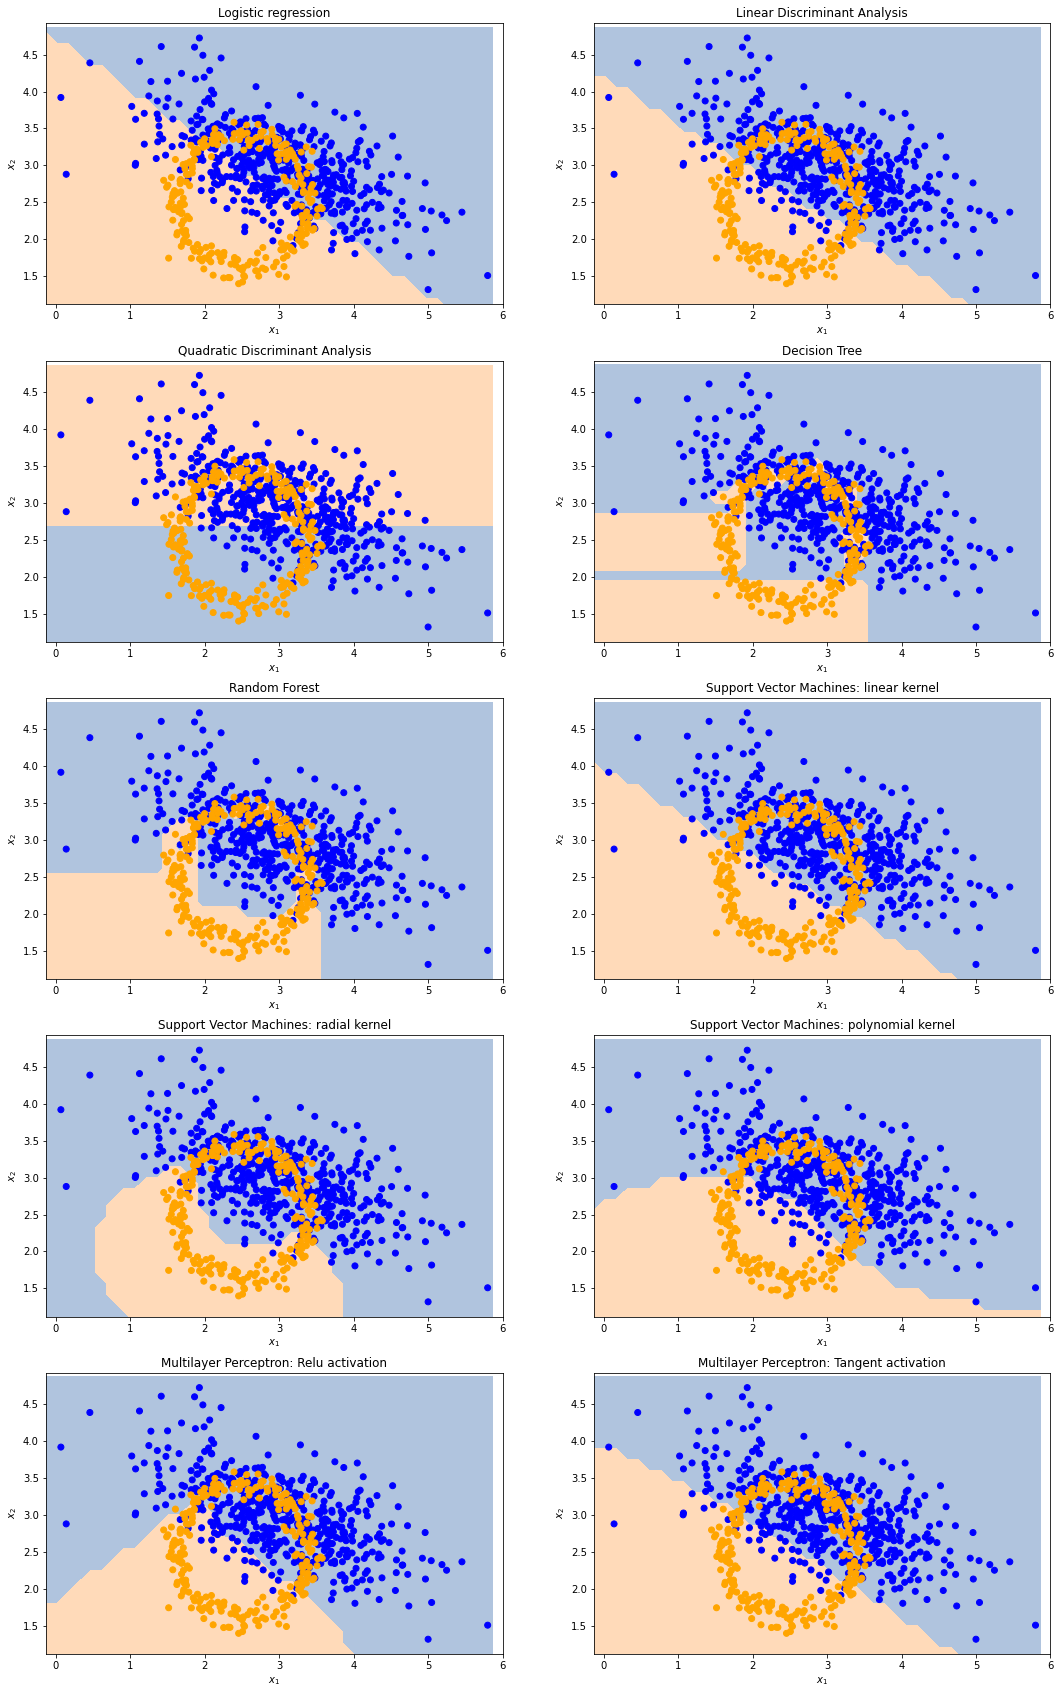

In [269]:
decision_boundaries(X,y)

### Sin(x) vs Cos(x)

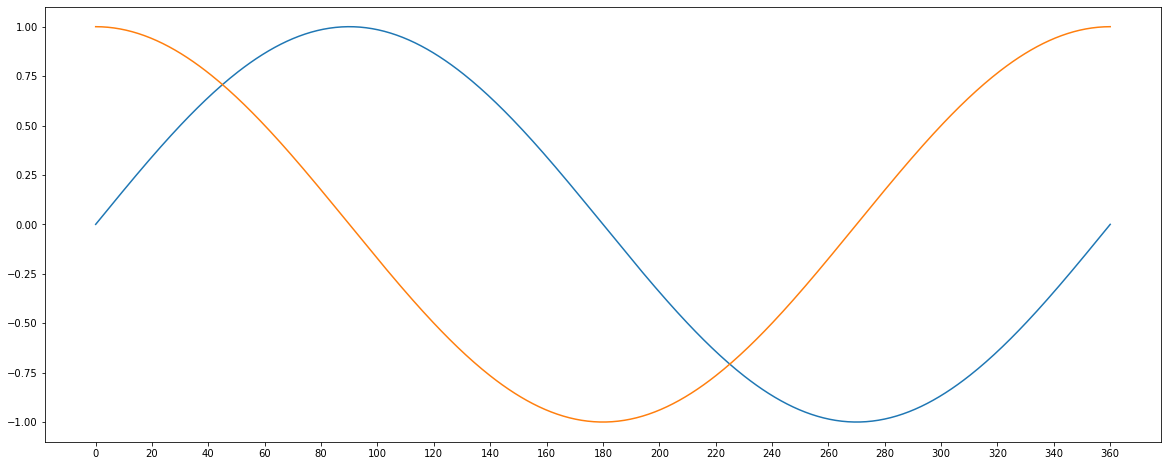

In [216]:
random_state = np.random.RandomState(seed=1)

# Sine
x1 = np.linspace(0,12, 500)*30; y1 = np.sin(np.radians(x1)); 

#Cosine
x2 = np.linspace(0,12, 500)*30; y2 = np.cos(np.radians(x2)); 

fig= plt.figure(figsize=(20,8))
plt.plot(x1,y1)
plt.plot(x2,y2)
#plt.xlim(0,360)
plt.xticks(ticks=np.linspace(0,360,19,endpoint=True))
plt.show()

In [ ]:
# Creating a matrix of 1,000.00 entries
# Feature 1 (X1): 500 + 500 evenly spaced degrees (0-360*C)
# Feature 2 (X2): Sine and Cosine and  values of the degrees in feature 1
# Target (y): Class 0 for sin(x) and class 1 for cos(x) 

# Feature arrays
X1=np.concatenate((x1,x2),axis=0)
X2=np.concatenate((y1,y2), axis=0)

# Feature matrix and target array
X=np.c_[X1,X2]
y=np.array([0]*500 + [1]*500)

#Plotting

cmp = colors.ListedColormap(["Blue", "Orange"])

titles=("Sine vs Cosine")

fig=plt.figure(figsize=(20,8))

ax=fig.add_subplot()
ax.scatter(X_[:,0], X_[:,1], c= cmp(y))
ax.set_title(titles)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

plt.xticks(ticks=np.linspace(0,360,13,endpoint=True))
plt.show()

In [1]:
decision_boundaries(X,y)

NameError: name 'decision_boundaries' is not defined

C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rucam\anaconda3\lib\site-packages\sklearn\neural_network\_multi

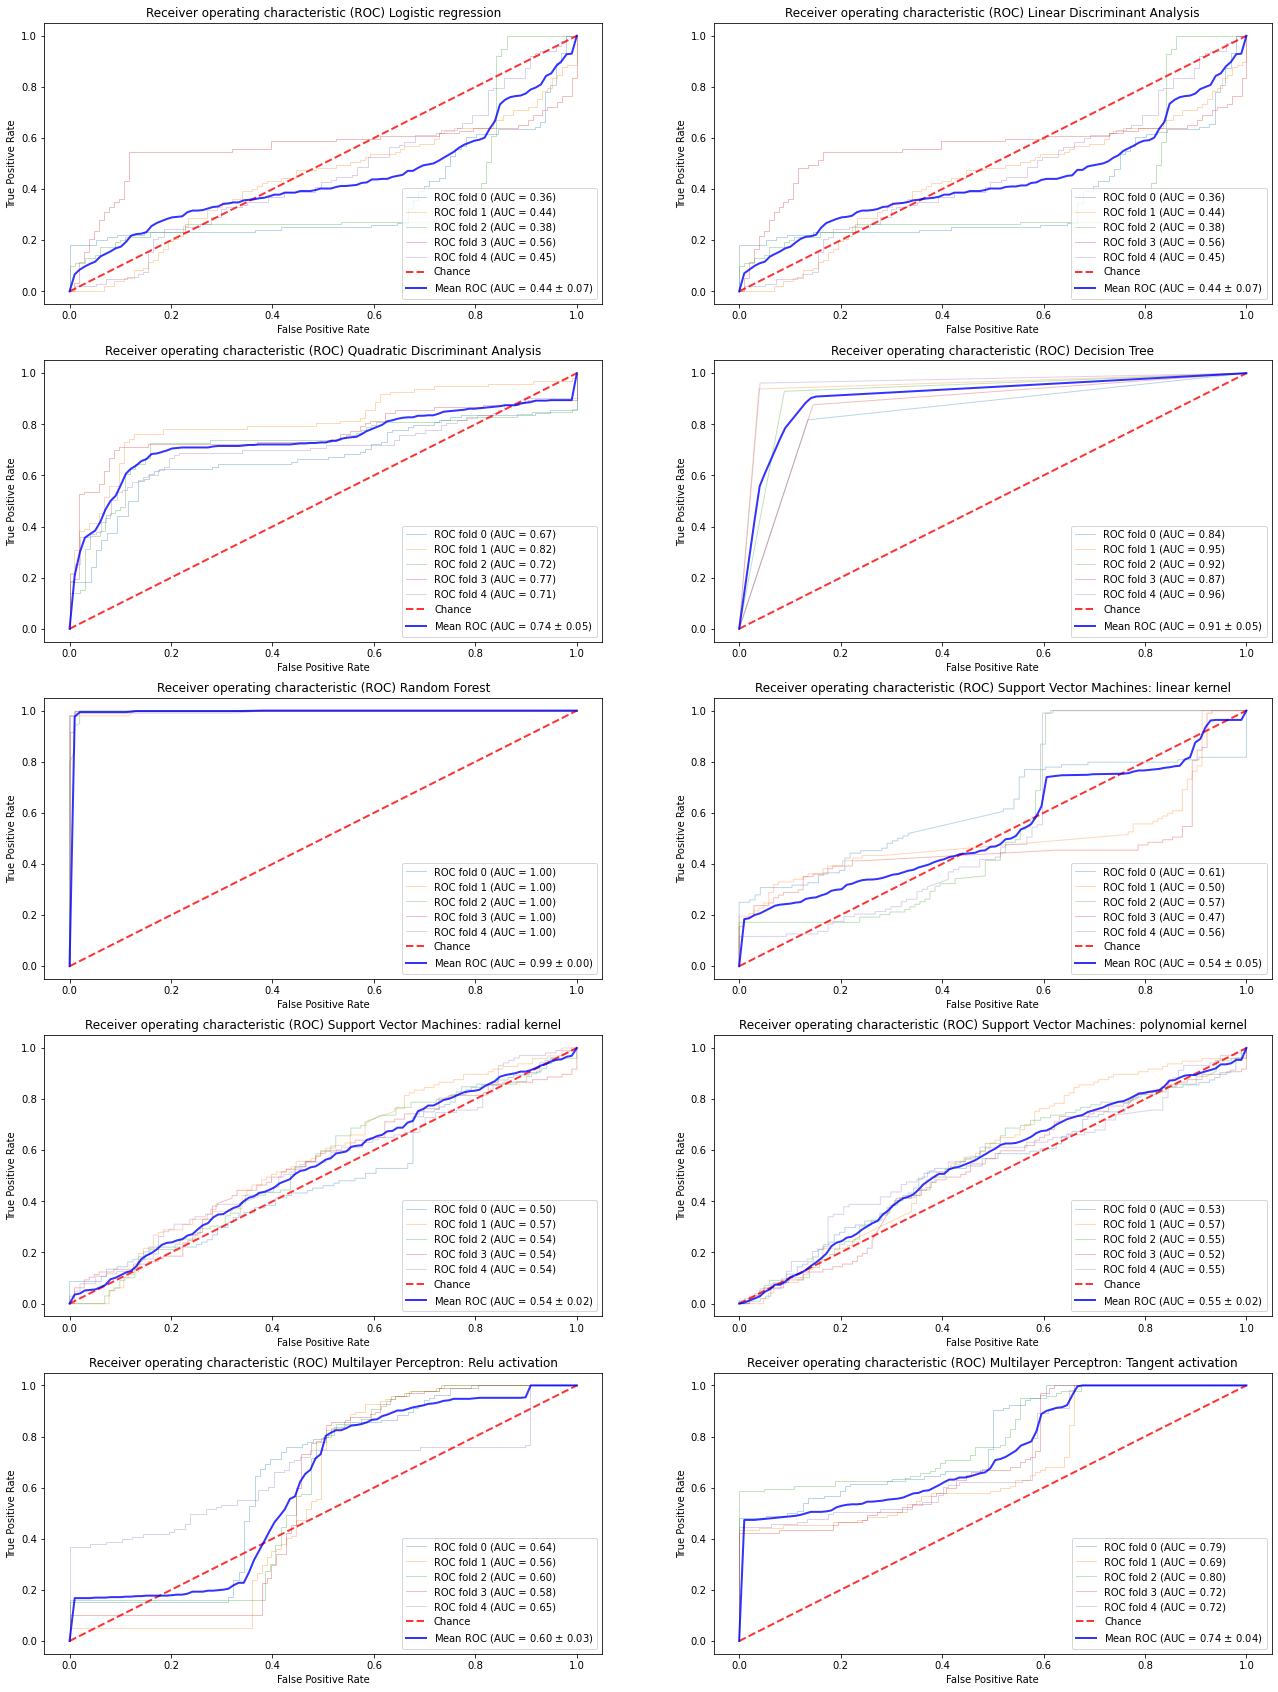

In [223]:
roc_curves(models, X, y)

In [219]:
scoring(models, X,y)

ValueError: Shape of passed values is (10, 3), indices imply (14, 3)

In [21]:
np.arange(12.)*30

array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
       330.])

## Other tests

### Clusters with differing distributions

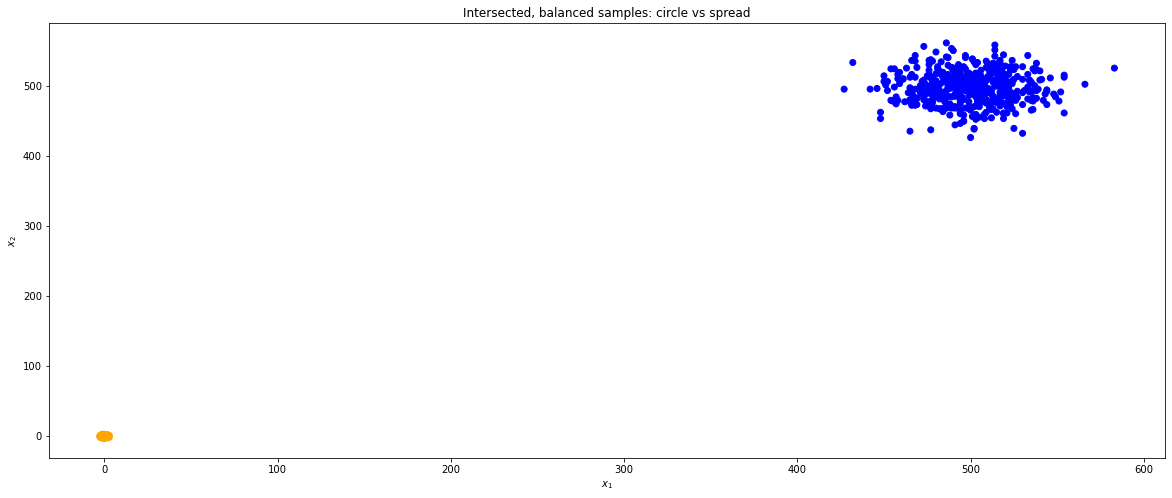

In [105]:
# First sampling

random_state1 = np.random.RandomState(seed=1)

x1_poisson = np.random.poisson(lam=(500), size=(500,1)); # cluster 1: sampled from a poisson distribution
x1_normal = np.random.normal(loc=0.0, scale=1.0, size = (500,1)) #Feature 2: sampled from a standard gaussian distribution


# Second sampling

random_state2 = np.random.RandomState(seed=2)

x2_poisson = np.random.poisson(lam=(500), size=(500,1))
x2_normal = np.random.normal(loc=0.0, scale=1.0, size = (500,1))

# Targets

y_poisson = np.array([0]*500)

y_normal = np.array([1]*500)

# Clusters matrix

X_poisson = np.c_[x1_poisson,x2_poisson]

X_normal = np.c_[x1_normal,x2_normal]

# Clobal matrix

X = np.concatenate((X_poisson, X_normal),axis=0)
y =  np.concatenate((y_poisson, y_normal),axis=0)

# Plotting
cmp = colors.ListedColormap(["Blue", "Orange"])

fig=plt.figure(figsize=(20,8))

ax=fig.add_subplot()
ax.scatter(X[:,0], X[:,1], c= cmp(y))
ax.set_title(titles)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

plt.show()

In [33]:
x1= np.random.standard_normal(250)
x2= np.random.standard_normal(250)

x1[:,np.newaxis]


array([[-0.30501818],
       [ 0.23132682],
       [-0.02315912],
       [-0.90607177],
       [ 1.20302375],
       [-1.28484612],
       [-0.68109566],
       [ 0.96613795],
       [-0.49721869],
       [ 0.52458646],
       [-0.58838291],
       [ 0.73925798],
       [ 0.20875059],
       [ 0.51993012],
       [ 1.26898199],
       [ 1.24026015],
       [ 1.04745034],
       [-1.46688704],
       [-0.66975843],
       [ 1.25019972],
       [-1.00558651],
       [-0.19987027],
       [-0.27170415],
       [ 0.98101937],
       [-0.18087152],
       [-0.47604839],
       [-0.93314207],
       [-1.08325633],
       [-0.22347735],
       [ 0.10167394],
       [-1.48368012],
       [-1.2144064 ],
       [ 0.11564877],
       [-0.31679139],
       [ 1.54492965],
       [-0.34978543],
       [ 0.79338064],
       [ 0.74887484],
       [ 0.60417326],
       [-0.84386379],
       [ 0.89754038],
       [ 0.26170466],
       [-1.26392748],
       [ 1.5758282 ],
       [-0.18834318],
       [-1

In [34]:
X = np.c_[x1,x2];
y=np.zeros(len(X));
y[X[:,0]+X[:,1]>0]=1

In [30]:
(len(X),len(y))

(250, 250)